### 1. IMPORT NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

### 2. LOAD THE DATASET

In [3]:
#Loading the dataset

file_path = 'Downloads\Infosys Springboard\Train.csv'
df = pd.read_csv(file_path)

print("Preview of the Dataset:")
df.head()

Preview of the Dataset:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Dataset Overview
#### Shape: 
   * The dataset contains 8523 rows and 12 columns.
#### Structure:
   * Missing values were detected in some columns, such as Store Size (e.g., "NaN"), which will require preprocessing and imputation.
   * No other major issues with structure are apparent at first glance.
#### Data Types:
   ##### Numerical:
   ###### Includes features like:
   * Protein Content (e.g., 0.016047): A numeric measure of protein in the product. 
   * Price (e.g., 249.8092): The price or value associated with the product.
   * Revenue (e.g., 3735.1380): The target variable representing the revenue generated.
   * Year (e.g., 1999): Time-related information, useful for trend analysis.
   ##### Categorical:
   ###### Includes features like:
   * Store ID and Outlet ID: Unique identifiers for stores and outlets.
   * Fat Content (e.g., "Low Fat" or "Regular"): Product nutritional classification.
   * Category (e.g., "Dairy", "Soft Drinks"): The type/category of the product. 
   * Store Size (e.g., "Medium", "High"): Represents the size of the store.
   * Tier (e.g., "Tier 1", "Tier 3"): The outlet's tier classification.
   * Supermarket Type (e.g., "Supermarket Type1", "Grocery Store"): Store type classification.

### 3. INFORMATION ABOUT THE DATA

In [4]:
# Shape of the data in rows & columns
rows, columns = df.shape
print("Total number of rows:", rows)
print("Total number of columns:", columns)

Total number of rows: 8523
Total number of columns: 12


In [5]:
# Get general info about the dataset
print("\nDataset Information:")
df.info()

# Summary statistics
print("\nDescriptive Statistics for Numerical Features:")
df.describe()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB

Descriptive Statistics

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# Check unique values in categorical columns
print("Unique values in 'Item_Fat_Content':")
print(df['Item_Fat_Content'].unique())

print("\nUnique values in 'Outlet_Size':")
print(df['Outlet_Size'].unique())

print("\nUnique values in 'Outlet_Location_Type':")
print(df['Outlet_Location_Type'].unique())

print("\nUnique values in 'Outlet_Type':")
print(df['Outlet_Type'].unique())

print("\nUnique values in 'Item_Type':")
print(df['Item_Type'].unique())

Unique values in 'Item_Fat_Content':
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Unique values in 'Outlet_Size':
['Medium' nan 'High' 'Small']

Unique values in 'Outlet_Location_Type':
['Tier 1' 'Tier 3' 'Tier 2']

Unique values in 'Outlet_Type':
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']

Unique values in 'Item_Type':
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


### 4. HANDLING MISSING VALUES

In [7]:
#Finding in which column has missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:" , missing_values)


Missing Values in Each Column: Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [8]:
#Filling missing values using median 
df['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.median()))

#Filling missing values using mode
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))


In [9]:
#Check for null values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
# Finding duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [11]:
#Handling Inconsistencies
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'
})
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


### 5. EXPLORATORY DATA ANALYSIS

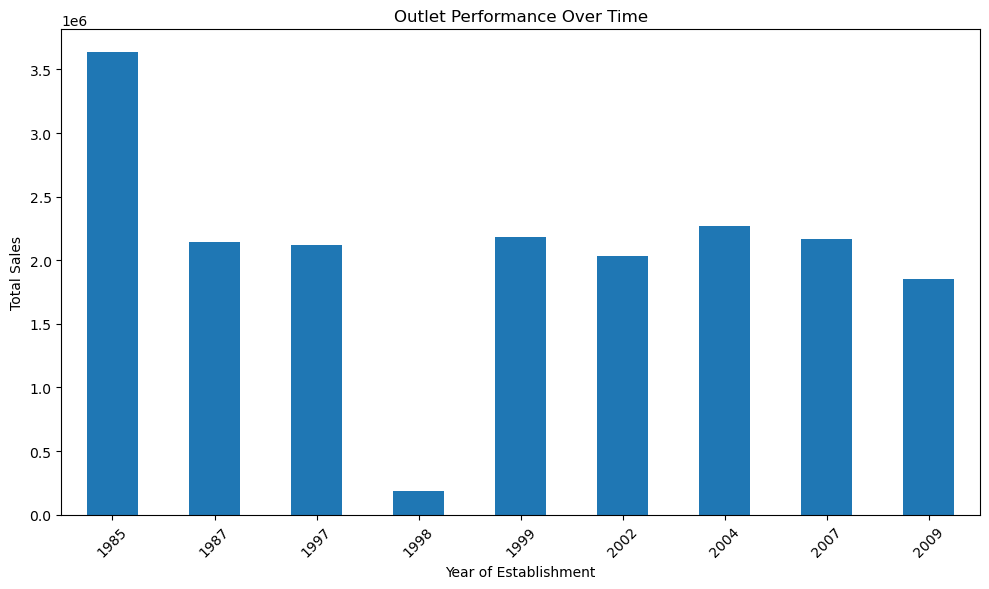

In [12]:
# Grouping and plotting sales by outlet establishment year
sales_by_year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='bar', title='Outlet Performance Over Time')
plt.xlabel('Year of Establishment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



####  Outlet Performance Over Time:
   * Outlets established in 1985 demonstrate the highest total sales, significantly outperforming outlets established in other years.
   * There is a notable dip in total sales for outlets established in 1998.
   * Outlets from years such as 1987, 1997, 2002, and 2004 perform at similar levels, maintaining moderate sales.
   * Newer outlets (e.g., 2009) appear to have relatively lower sales compared to older outlets.

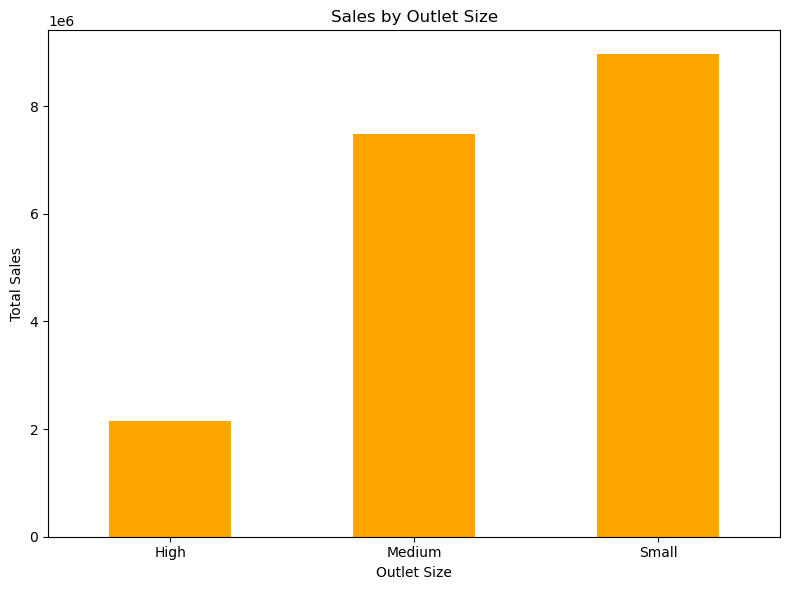

In [13]:
# Grouping and plotting sales by outlet size
sales_by_size = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(8, 6))
sales_by_size.plot(kind='bar', title='Sales by Outlet Size', color='orange')
plt.xlabel('Outlet Size')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



####  Sales by Outlet Size:
   * Outlets categorized as Small generate the highest sales, followed closely by Medium-sized outlets.
   * High-sized outlets show significantly lower sales, suggesting they may not be as efficient or profitable compared to smaller outlets.

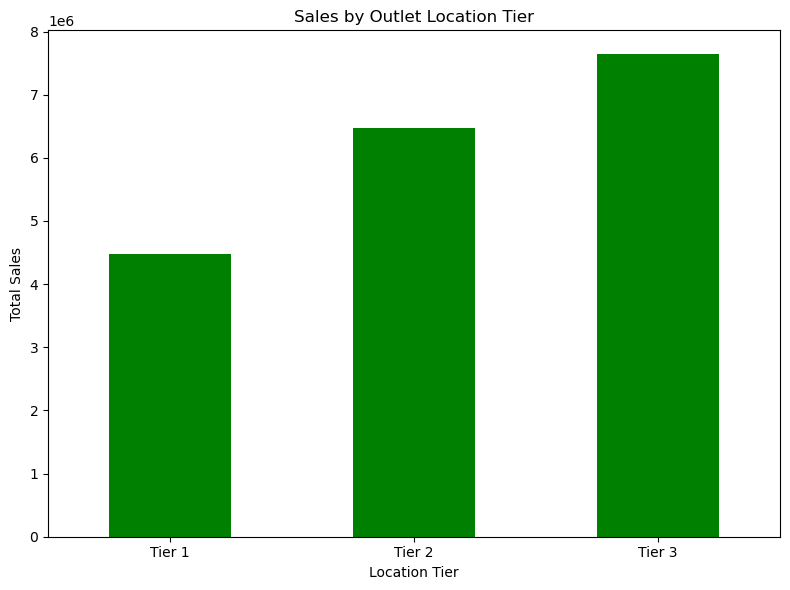

In [14]:
# Grouping and plotting sales by location tier
sales_by_tier = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(8, 6))
sales_by_tier.plot(kind='bar', title='Sales by Outlet Location Tier', color='green')
plt.xlabel('Location Tier')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



####  Sales by Outlet Location Tier:
   * Tier 3 locations outperform both Tier 1 and Tier 2 locations in terms of total sales.
   * Tier 2 locations follow closely, while Tier 1 locations lag behind, showing the lowest total sales among the tiers.

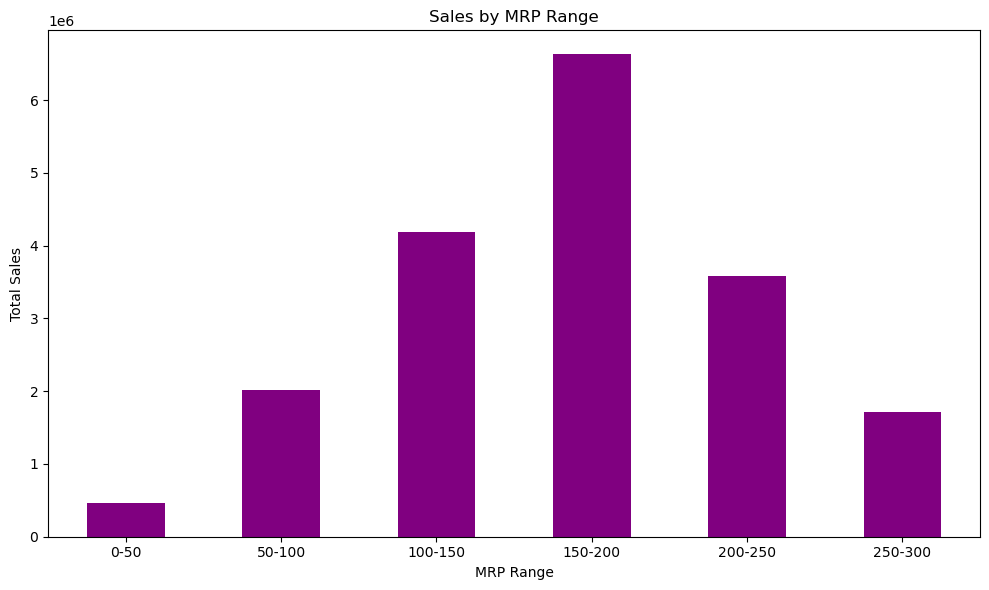

In [15]:
# Binning MRP into ranges and plotting sales
df['MRP_Range'] = pd.cut(df['Item_MRP'], bins=[0, 50, 100, 150, 200, 250, 300], labels=['0-50', '50-100', '100-150', '150-200', '200-250', '250-300'])
sales_by_mrp_range = df.groupby('MRP_Range')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(10, 6))
sales_by_mrp_range.plot(kind='bar', title='Sales by MRP Range', color='purple')
plt.xlabel('MRP Range')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()





#### Conclusion:
   * Most sales come from the 150-200 MRP range.
   * 100-150 and 200-250 ranges also perform well.
   * 0-50 and 250-300 ranges have the lowest sales.
#### Suggestions:
   * Focus on products in the 150-200 MRP range.
   * Improve marketing for 100-150 and 200-250 ranges.
   * Investigate why 0-50 and 250-300 ranges are underperforming.
   * Adjust pricing to match popular ranges if possible.
   * Gather customer feedback to refine products and pricing.

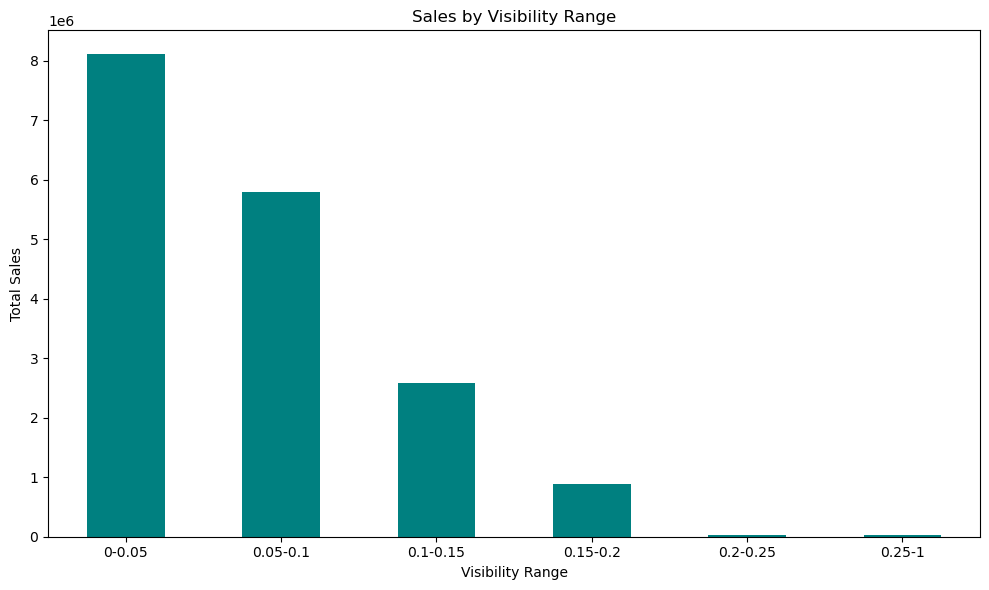

In [16]:
# Binning visibility into ranges and plotting sales
df['Visibility_Range'] = pd.cut(df['Item_Visibility'], bins=[0, 0.05, 0.1, 0.15, 0.2, 0.25, 1], labels=['0-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2', '0.2-0.25', '0.25-1'])
sales_by_visibility = df.groupby('Visibility_Range')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(10, 6))
sales_by_visibility.plot(kind='bar', title='Sales by Visibility Range', color='teal')
plt.xlabel('Visibility Range')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



#### Conclusion:
   * Items with lower visibility (0–0.05) generate the highest sales, while sales decrease significantly for products with higher visibility.
#### Suggestion:
   * Focus on improving the placement of mid-visibility products (0.1–0.2) to boost their sales.
   * Encourage customers to explore lesser-known products through promotions, discounts, or visibility enhancements.

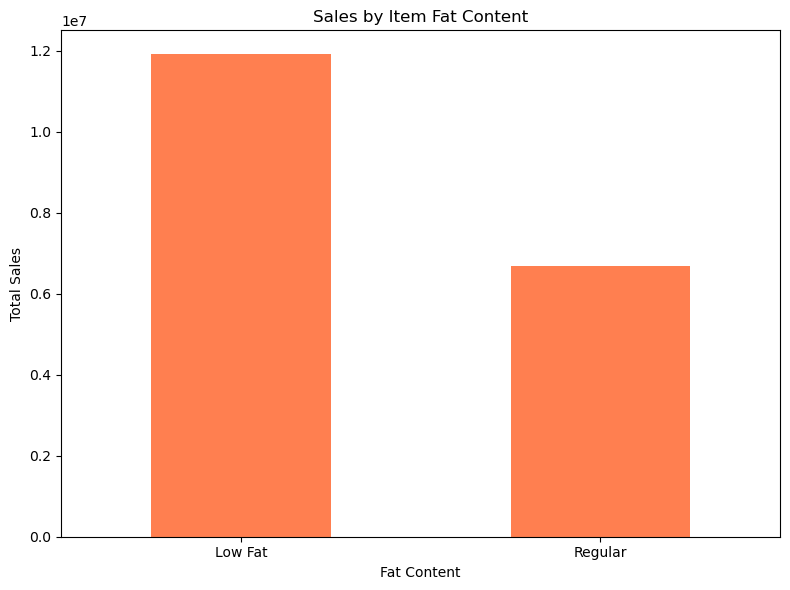

In [17]:
# Grouping and plotting sales by fat content
sales_by_fat_content = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(8, 6))
sales_by_fat_content.plot(kind='bar', title='Sales by Item Fat Content', color='coral')
plt.xlabel('Fat Content')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



#### Conclusion:
   * Low-fat items are more popular, contributing more significantly to total sales compared to regular-fat items.
#### Suggestion:
   * Opt for low-fat products if health-conscious. Retailers can emphasize the health benefits of these items to attract more individual customers.

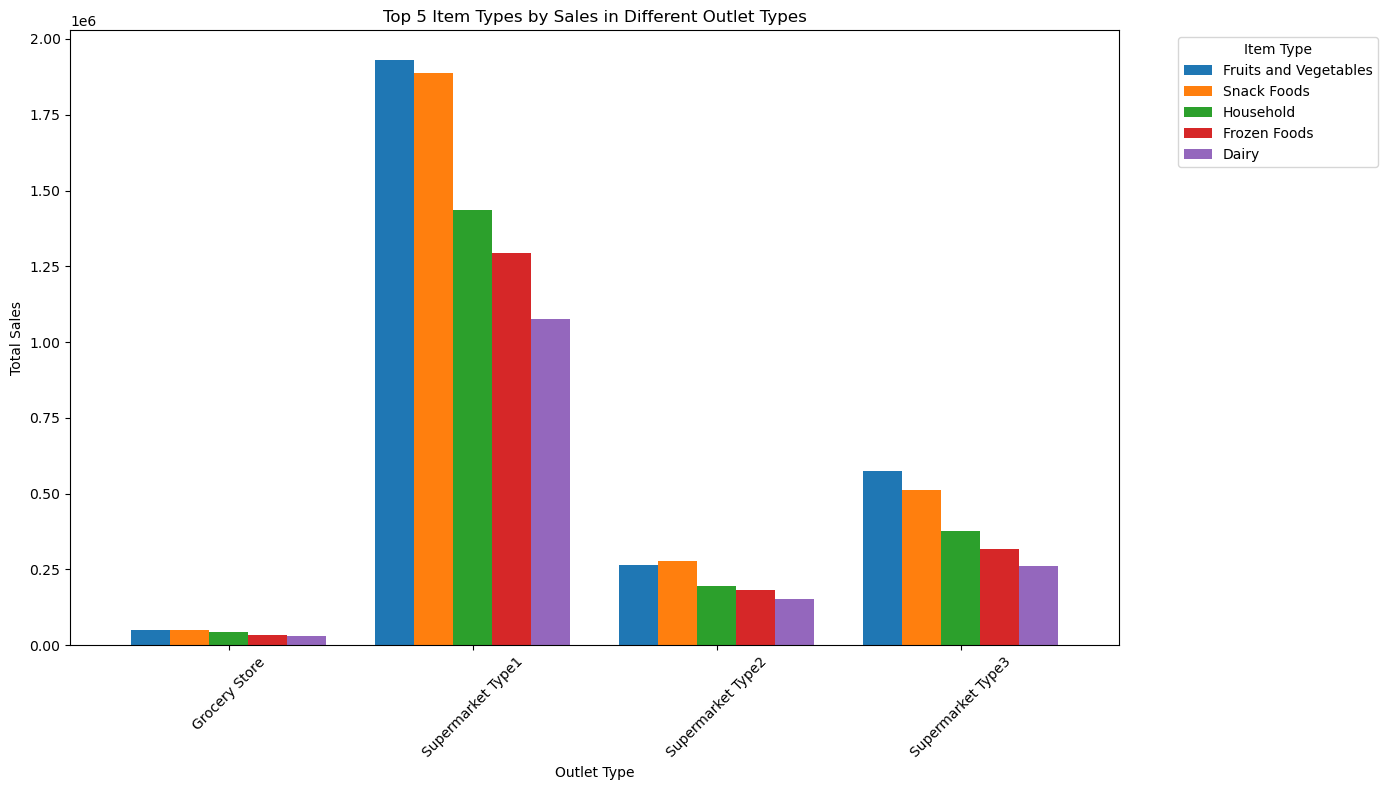

In [18]:
# Finding top-performing products for each outlet type
top_products_by_outlet = df.groupby(['Outlet_Type', 'Item_Type'])['Item_Outlet_Sales'].sum().unstack()
top_item_types = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().nlargest(5).index
filtered_top_products = top_products_by_outlet[top_item_types]
filtered_top_products.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Top 5 Item Types by Sales in Different Outlet Types')
plt.xlabel('Outlet Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Conclusion:
   * Supermarket Type 1 offers the best variety and drives the highest sales in categories like "Fruits and Vegetables" and "Snack Foods."
   * Grocery stores have limited sales, indicating fewer offerings or less variety.
#### Suggestion:
   * Choose Supermarket Type 1 for a wider range of products and better availability of popular items.
   * Advocate for better product availability in grocery stores if they are closer or more convenient.

### 1. Distribution of sales by Item type

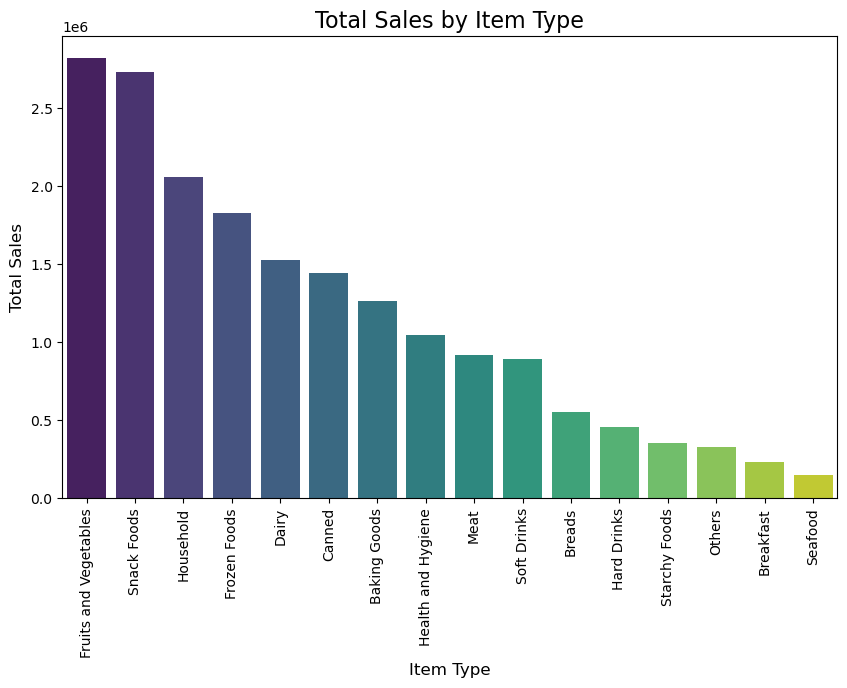

In [19]:
#1.Distribution of sales by Item type

sales_by_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_item_type.index, y=sales_by_item_type.values, palette='viridis') 
plt.title('Total Sales by Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90)
plt.show()

#### Visualization: 
   Bar plot showing the total sales for each item type.
#### Conclusion:
   * Fruits and Vegetables have the highest sales.
   * Seafood sales lag significantly.
#### Suggestion: 
   Consider analyzing why seafood sales are low—e.g., customer preferences, pricing, or availability.

### 2. Sales Performance by outlet establishment year

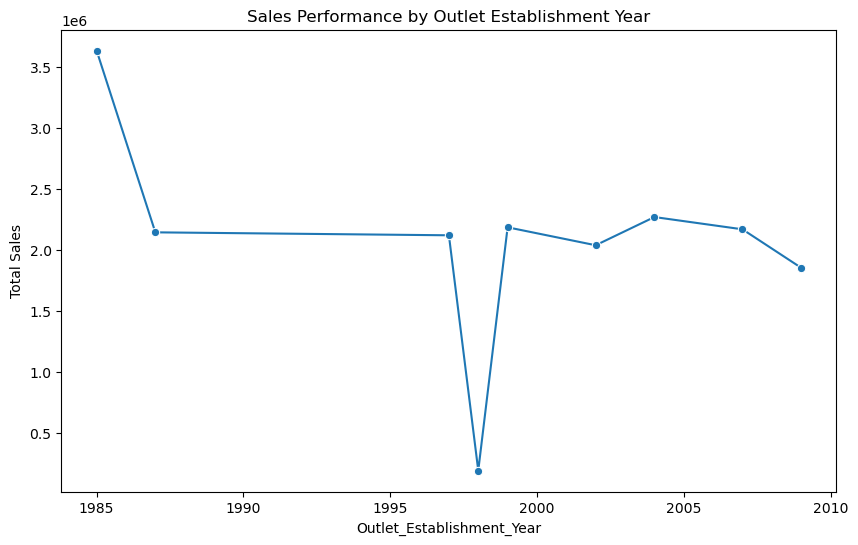

In [20]:
#2. Sales Performance by outlet establishment year

df_year_sales = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df_year_sales, marker='o')
plt.title('Sales Performance by Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.show()


#### Visualization:  
   * Line plot of total sales by the year the outlet was established.
#### Conclusion:
   * Older outlets have strong initial sales.
   * Sales dip for outlets established in the late 1990s, followed by modest recovery.
#### Suggestion:
   Perform further analysis of external factors (e.g., market trends or competition during those years).

### 3. Sales distribution across outlet types

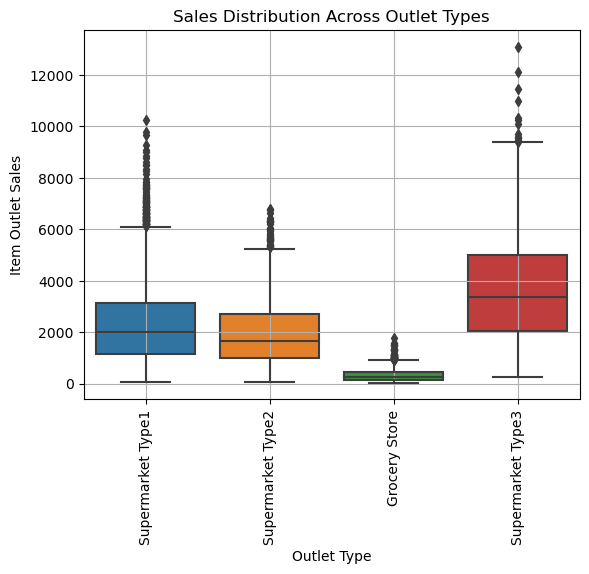

In [21]:
#3. Sales distribution across outlet types

sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)
plt.title('Sales Distribution Across Outlet Types')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


#### Visualization:  
   Box plot comparing sales distributions by outlet type.
#### Conclusion:
   * Supermarket Type 3 outperforms other types.
   * Grocery stores consistently have the lowest sales.
#### Suggestion: 
   Investigate differences in marketing strategies, customer base, and product offerings between supermarkets and grocery stores.


### 4. Effect of Outlet Size on Sales

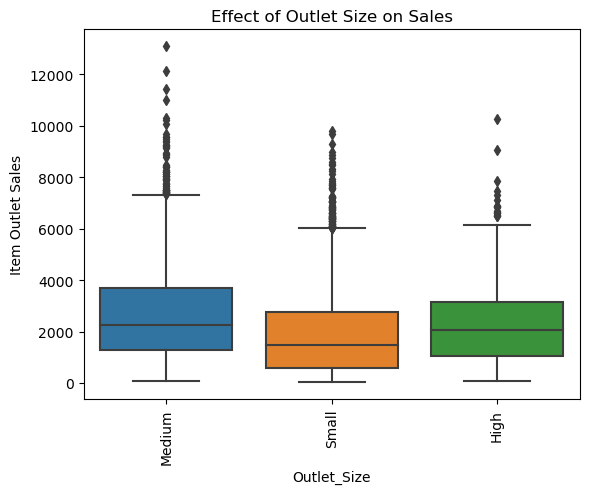

In [22]:
#4. Effect of Outlet Size on Sales

sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)
plt.title('Effect of Outlet Size on Sales')
plt.xlabel('Outlet_Size')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=90)
plt.show()


#### Visualization:  
   Box plot of sales by outlet size (Small, Medium, Large).
#### Conclusion:
  * Medium-sized outlets lead in sales.
  * Small outlets struggle, while large outlets show consistent but moderate sales.
#### Suggestion: 
   Look into whether medium outlets better align with customer preferences or operational efficiencies.

### 5.Relationship between Item MRP and Sales

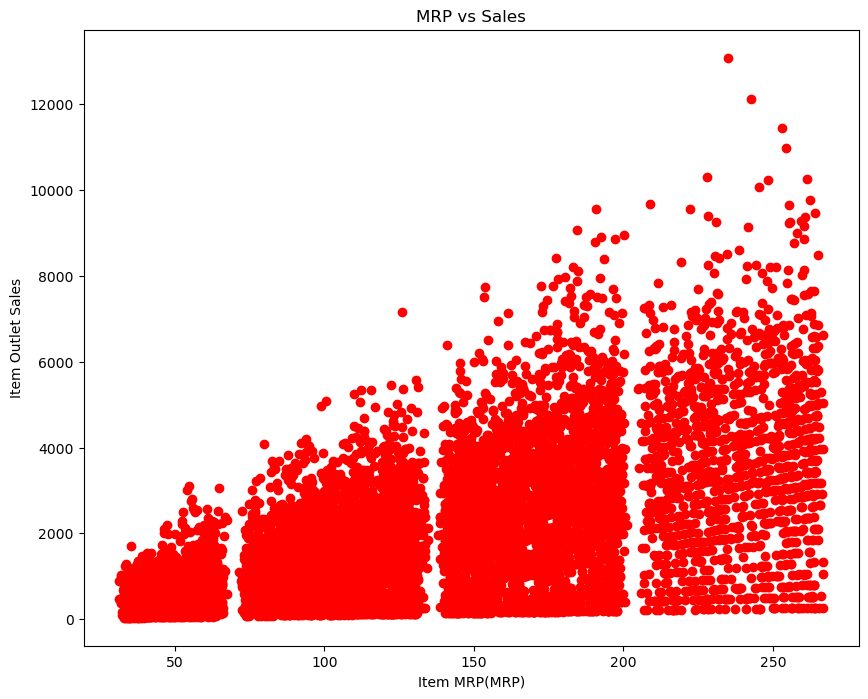

In [23]:
# 5.Relationship between Item MRP and Sales

#MRP VS SALES
plt.figure(figsize=(10,8))
plt.scatter(df['Item_MRP'],df['Item_Outlet_Sales'],color='red')
plt.title('MRP vs Sales')
plt.xlabel('Item MRP(MRP)')
plt.ylabel('Item Outlet Sales')
plt.show()


#### Visualization:  
   Scatter plot comparing item MRP and sales.
#### Conclusion:
   * Higher-priced items often lead to higher sales.
   * Lower-priced items can still achieve good performance in some cases.
#### Suggestion: 
   Explore pricing elasticity and customer purchasing power for further insights.

### 6. Correlation heatmap (Numerical Variables)

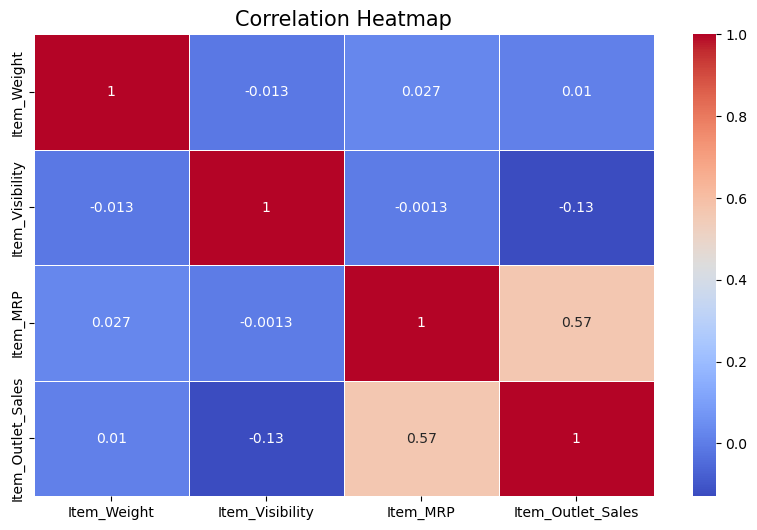

In [24]:
# 6. Correlation heatmap (Numerical Variables)

plt.figure(figsize=(10,6))
corr_matrix = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()


#### Visualization:  
   Heatmap of correlations between numerical features.
#### Conclusion:
   * Item MRP has the strongest positive correlation with sales
   * Item Weight and Item Visibility have weak correlations.
#### Suggestion: 
   Emphasize MRP in the predictive model and consider advanced feature engineering for other variables.

### 7. Histograms of Numerical Features

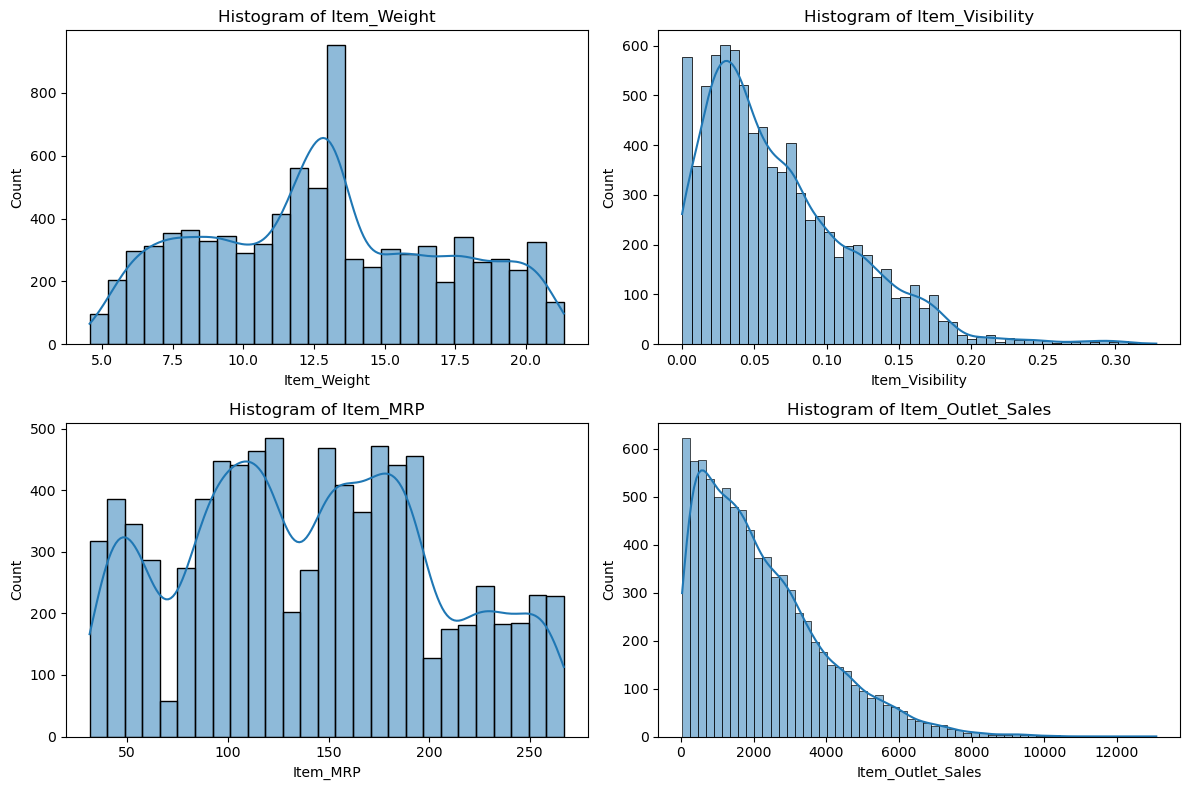

In [25]:
#7. Histograms of Numerical Features

numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(2, 2, numerical_features.index(feature) + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

#### Visualization:  
   Histograms for numerical features (Item_Weight, Item_Visibility, Item_MRP, and Item_Outlet_Sales).
#### Conclusion:
   * MRP and sales distributions are skewed.
   * Visibility and weight have distinct patterns that might need transformations.
#### Suggestion: 
   Apply scaling or log transformations to handle skewness where necessary.


### 8. Average Price for Each Item

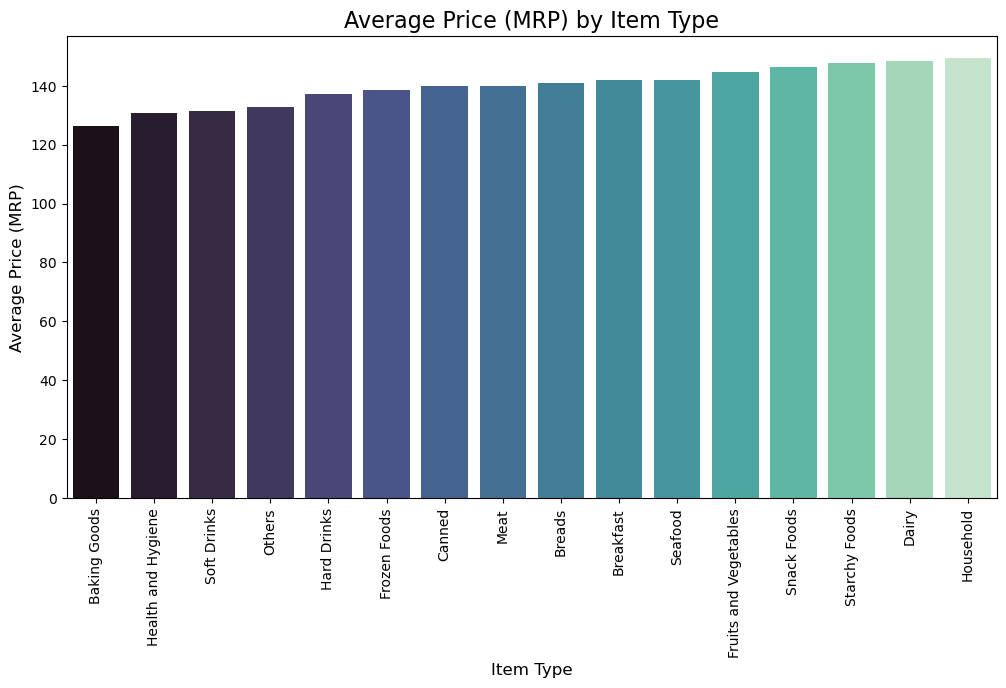

In [26]:
#8. Average Price for Each Item
# Calculate average MRP for each item type
avg_price_by_item = df.groupby('Item_Type')['Item_MRP'].mean().sort_values(ascending=True)

# Plot average MRP by item type
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_item.index, y=avg_price_by_item.values, palette='mako')
plt.title('Average Price (MRP) by Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Average Price (MRP)', fontsize=12)
plt.xticks(rotation=90)
plt.show()


#### Observation:
   The average MRP is fairly consistent across all item types, with slight variations. Categories such as Household and Dairy have the highest average MRP, while Baking Goods is on the lower end of the spectrum.
#### Conclusion:
   * Price differentiation is minimal across item types. 
   * This could indicate that the store maintains a uniform pricing strategy regardless of the product category.
#### Suggestion:
   * To enhance revenue, focus on targeted promotions for higher-MRP categories such as Household and Dairy, as they contribute more to the revenue per unit sold.
   * Reassess pricing strategies for low-MRP categories like Baking Goods to potentially introduce premium product lines or upsell opportunities.


### 9. Calculate average sales for each item type

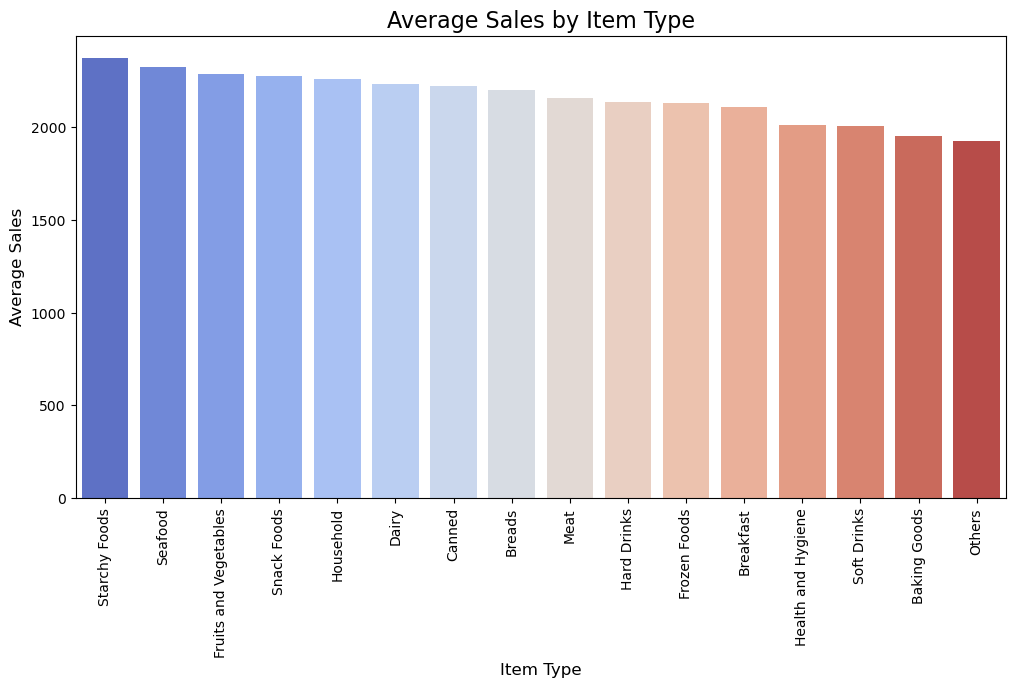

In [27]:
#9. Calculate average sales for each item type
avg_sales_by_item = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

# Plot average sales by item type
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_sales_by_item.index, y=avg_sales_by_item.values, palette='coolwarm')
plt.title('Average Sales by Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=90)
plt.show()


#### Observation:
   * Starchy Foods and Seafood lead in average sales, followed closely by Fruits and Vegetables and Snack Foods. 
   * On the lower end, categories such as Others, Soft Drinks, and Baking Goods show reduced average sales performance.
#### Conclusion:
   * High-performing categories (Starchy Foods, Seafood) are likely popular staples or high-demand items. 
   * On the other hand, low-performing categories might be niche or face stronger competition.
#### Suggestion:
   * Invest in marketing campaigns for high-performing categories to sustain momentum and build brand loyalty.
   * Consider inventory optimization and promotional campaigns to improve sales in underperforming categories like Soft Drinks and Baking Goods.
   * Perform customer surveys to understand why certain categories like Others lag behind and realign product offerings accordingly.


### 10. Sales Across Item Fat Content

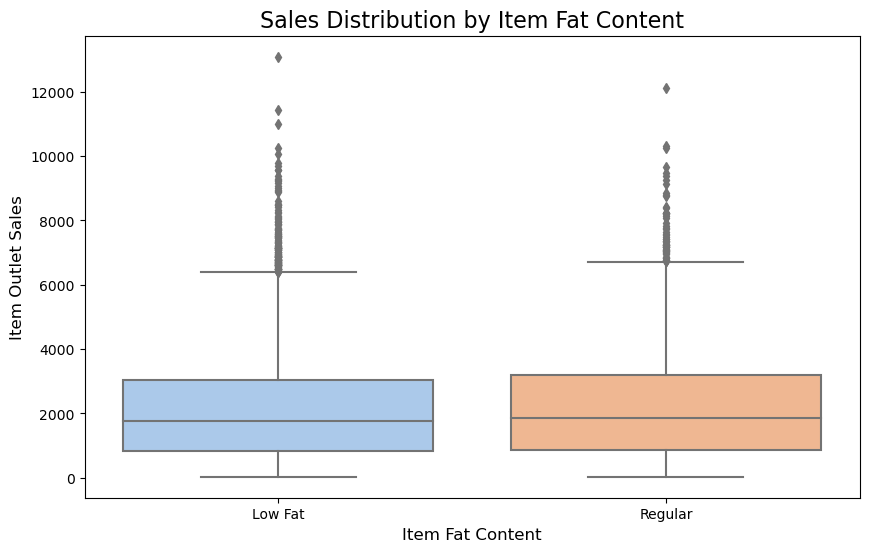

In [28]:
#10. Sales Across Item Fat Content

# Plot sales distribution by item fat content
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df, palette='pastel')
plt.title('Sales Distribution by Item Fat Content', fontsize=16)
plt.xlabel('Item Fat Content', fontsize=12)
plt.ylabel('Item Outlet Sales', fontsize=12)
plt.show()

#### Observation:
   * Both "Low Fat" and "Regular" items have a similar median sales value.
   * The sales range is slightly higher for "Low Fat" items, with a greater number of outliers in higher sales values.
   * There is a noticeable overlap in sales distribution between the two categories.
#### Conclusion:
   * "Low Fat" items may appeal to a broader customer base, leading to higher sales variability.
   * "Regular" items are consistent performers but may have a slightly smaller target audience.
#### Suggestions:
   * Invest in targeted marketing for "Low Fat" items as they show a higher potential for driving high sales.
   * Perform segmentation analysis to understand the audience for "Regular" products and tailor promotions accordingly.
   * Investigate the drivers behind outliers in "Low Fat" sales and apply those strategies across both categories.


### 11. Outlet-Type-Wise Sales Proportion

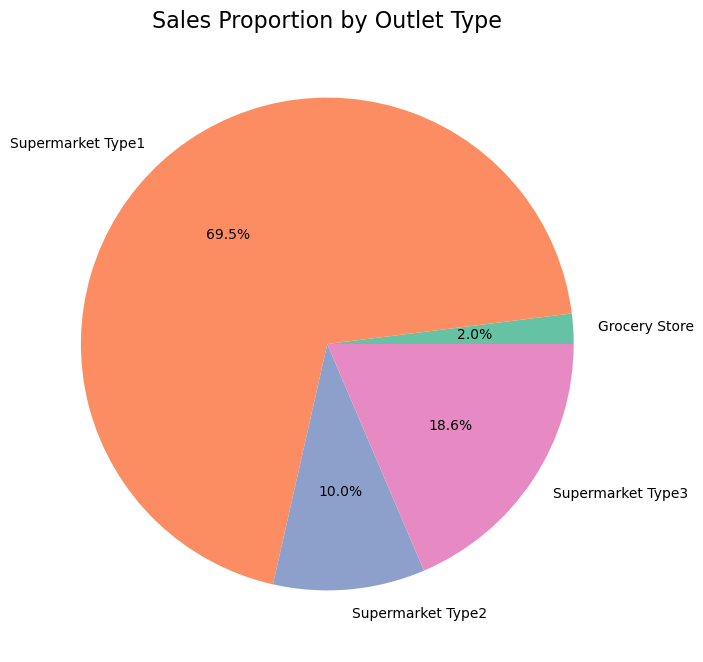

In [29]:
#11. Outlet-Type-Wise Sales Proportion
# Calculate sales proportion by outlet type
sales_by_outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
sales_proportion = (sales_by_outlet_type / sales_by_outlet_type.sum()) * 100

# Pie chart of sales proportions
plt.figure(figsize=(8, 8))
sales_proportion.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Sales Proportion by Outlet Type', fontsize=16)
plt.ylabel('')  # Remove the default ylabel
plt.show()


#### Observation:
   * Supermarket Type1 contributes the majority of sales (69.5%).
   * Supermarket Type3 and Supermarket Type2 contribute 18.6% and 10.0% of sales, respectively.
   * Grocery Stores account for only 2% of total sales.
#### Conclusion:
   * Supermarket Type1 is the most dominant retail format, likely due to better customer engagement, product availability, and location strategy.
   * Grocery Stores underperform significantly, indicating a limited role in overall revenue generation.
#### Suggestions:
   * Allocate more resources and promotional campaigns to Supermarket Type1 to maximize returns.
   * Investigate challenges faced by Grocery Stores (e.g., location, inventory, or foot traffic) and assess whether they should be retained or repurposed.
   * Explore strategies to boost the performance of Supermarket Type3 and Type2, as they represent substantial growth opportunities.


### 12. Average sales by Outlet Size

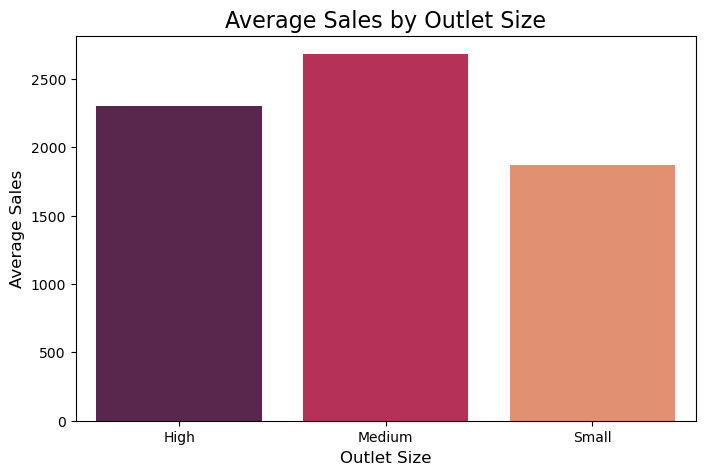

In [30]:
# 12. Calculate average sales by outlet size
avg_sales_by_size = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

# Plot average sales by outlet size
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_sales_by_size.index, y=avg_sales_by_size.values, palette='rocket')
plt.title('Average Sales by Outlet Size', fontsize=16)
plt.xlabel('Outlet Size', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.show()


#### Observation:
   * Medium-sized outlets have the highest average sales.
   * Large-sized outlets perform moderately well.
   * Small-sized outlets have the lowest average sales among the three categories.
#### Conclusion:
   * Medium-sized outlets strike a balance between inventory, operational costs, and customer traffic, leading to optimal performance.
   * Smaller outlets may face constraints like limited inventory or footfall, resulting in lower sales.
   * Large outlets, while performing reasonably, do not surpass medium outlets in average sales.
#### Suggestions:
   * Focus on expanding Medium-sized outlets, as they generate the highest returns.
   * Conduct performance audits for Small-sized outlets to identify areas for improvement, such as optimizing the product mix or local promotions.
   * Assess the cost-to-revenue ratio for Large-sized outlets to identify why they are not outperforming and explore efficiency improvements.


### 6. FEATURE DERIVATION

In [31]:
# Creating a new column 'Outlet_age' to calculate the store's age based on its establishment year
df['Outlet_age'] = 2024 - df['Outlet_Establishment_Year']
# Deriving a new feature: 'sales_per_mrp' by dividing Item_Outlet_Sales by Item_MRP
# This step handles potential division by zero by replacing zero values with 1
df['sales_per_mrp'] = df['Item_Outlet_Sales'] / df['Item_MRP'].replace(0, 1)  # Replace 0 with 1 to avoid division by zero
# Printing relevant columns to verify
print(df[['Outlet_Establishment_Year', 'Outlet_age', 'Item_Outlet_Sales', 'Item_MRP', 'sales_per_mrp']].head())

   Outlet_Establishment_Year  Outlet_age  Item_Outlet_Sales  Item_MRP  \
0                       1999          25          3735.1380  249.8092   
1                       2009          15           443.4228   48.2692   
2                       1999          25          2097.2700  141.6180   
3                       1998          26           732.3800  182.0950   
4                       1987          37           994.7052   53.8614   

   sales_per_mrp  
0      14.951963  
1       9.186454  
2      14.809346  
3       4.021967  
4      18.467868  


In [32]:
rows, columns = df.shape
print("Total number of rows:", rows)
print("Total number of columns:", columns)

Total number of rows: 8523
Total number of columns: 16


In [33]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'MRP_Range', 'Visibility_Range',
       'Outlet_age', 'sales_per_mrp'],
      dtype='object')

These new features (Outlet_age and sales_per_mrp) will help improve model predictions by providing insights into outlet longevity and product sales efficiency.

### 7. CATEGORICAL VARIABLE ENCODING

In [34]:
# Target Encoding for high cardinality columns
high_cardinality_columns = ['Item_Identifier', 'Outlet_Identifier']
target_encoder = TargetEncoder(cols=high_cardinality_columns)

# Assuming your dataset is named 'df'
df = target_encoder.fit_transform(df, df['Item_Outlet_Sales'])

# Identifying categorical and numerical columns for encoding and scaling
nominal_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']
ordinal_columns = ['Outlet_Size']
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Print the categorized columns
print("Nominal Columns: ", nominal_columns)
print("Ordinal Columns: ", ordinal_columns)
print("Numerical Columns: ", numerical_columns)


Nominal Columns:  ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']
Ordinal Columns:  ['Outlet_Size']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP']


In [35]:
# Mapping for ordinal encoding - ordered sizes for 'Outlet_Size'
Outlet_Size_mapping = ['Small', 'Medium', 'High'] 

In [36]:
ohe = OneHotEncoder(drop='first', sparse_output=False)  # For nominal columns
ode = OrdinalEncoder(categories=[Outlet_Size_mapping])  # For ordinal column
scaler = StandardScaler()  # For numeric columns

In [37]:
ct = make_column_transformer(
    (ohe, nominal_columns),  # Nominal columns
    (ode, ordinal_columns),  # Ordinal column
    (scaler, numerical_columns),  # Numeric columns
    remainder='passthrough'
)
ct.set_output(transform='pandas')  
data_encoded = ct.fit_transform(df) 

In [38]:
df_encoded = ct.fit_transform(df)
df_encoded

,onehotencoder__Item_Fat_Content_Regular,onehotencoder__Item_Type_Breads,onehotencoder__Item_Type_Breakfast,onehotencoder__Item_Type_Canned,onehotencoder__Item_Type_Dairy,onehotencoder__Item_Type_Frozen Foods,onehotencoder__Item_Type_Fruits and Vegetables,onehotencoder__Item_Type_Hard Drinks,onehotencoder__Item_Type_Health and Hygiene,onehotencoder__Item_Type_Household,...,standardscaler__Item_Visibility,standardscaler__Item_MRP,remainder__Item_Identifier,remainder__Outlet_Identifier,remainder__Outlet_Establishment_Year,remainder__Item_Outlet_Sales,remainder__MRP_Range,remainder__Visibility_Range,remainder__Outlet_age,remainder__sales_per_mrp
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.970732,1.747454,2879.598286,2348.354635,1999,3735.1380,200-250,0-0.05,25,14.951963
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.908111,-1.489023,1920.354050,1995.498739,2009,443.4228,0-50,0-0.05,15,9.186454
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.956917,0.010040,2030.685308,2348.354635,1999,2097.2700,100-150,0-0.05,25,14.809346
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.281758,0.660050,2347.410648,339.351662,1998,732.3800,150-200,NaN,26,4.021967
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.281758,-1.399220,1879.152033,2298.995256,1987,994.7052,50-100,NaN,37,18.467868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.181193,1.180783,2424.628001,2298.995256,1987,2778.3834,200-250,0.05-0.1,37,12.951520
8519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.371154,-0.527301,2271.350452,2192.384798,2002,549.2850,100-150,0-0.05,22,5.078589
8520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.599784,-0.897208,1991.431370,2438.841866,2004,1193.1136,50-100,0-0.05,20,14.016447
8521,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.532880,-0.607977,2158.829654,1995.498739,2009,1845.5976,100-150,0.1-0.15,15,17.895281


In [39]:
# Cleaning up column names to remove the transformer prefix
data_encoded.columns = [col.replace("onehotencoder__", "")
                             .replace("ordinalencoder__", "")
                             .replace("standardscaler__", "")
                             .replace("remainder__","")
                             for col in data_encoded.columns]
print("Encoded Columns:\n", data_encoded.columns.tolist())

Encoded Columns:
 ['Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3', 'Outlet_Size', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'MRP_Range', 'Visibility_Range', 'Outlet_age', 'sales_per_mrp']


In [40]:
data_encoded.columns

Index(['Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Size', 'Item_Weight',
       'Item_Visibility', 'Item_MRP', 'Item_Identifier', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'MRP_Range',
       'Visibility_Range', 'Outlet_age', 'sales_per_mrp'],
      dtype='object')

In [41]:
rows, columns = data_encoded.shape
print("Total number of rows after encoding:", rows)
print("Total number of columns after encoding:", columns)

Total number of rows after encoding: 8523
Total number of columns after encoding: 33


#### 1. Target Encoding for High-Cardinality Columns
   High-cardinality columns like Item_Identifier and Outlet_Identifier are encoded based on the mean of Item_Outlet_Sales.
#### 2. Categorical and Numerical Columns Identified
   * Nominal Columns: Item_Fat_Content, Item_Type, Outlet_Location_Type, Outlet_Type.
   * Ordinal Columns: Outlet_Size.
   * Numerical Columns: Item_Weight, Item_Visibility, Item_MRP.
#### 3. Ordinal Encoding
   Encodes Outlet_Size as an ordered category: ['Small', 'Medium', 'High'].
#### 4. One-Hot Encoding for Nominal Columns
   Converts nominal variables into binary columns, ensuring no redundancy by dropping the first category.
#### 5. Scaling of Numerical Columns
   Standardizes numerical features to ensure consistency by scaling them to have a mean of 0 and standard deviation of 1.
#### 6. Column Transformation
   Combines ordinal encoding, one-hot encoding, and scaling into a single transformation process.
#### 7. Cleaning Up Column Names
   Removes prefixes from transformed column names to improve readability.
#### 8. Summary of Transformed Data
  * Rows: 8523
  * Columns: 31
#### 9. Final Column Names
   Includes transformed features such as encoded nominal categories, ordinal variables, scaled numerical columns, and remaining columns like Item_Outlet_Sales, Outlet_age, and sales_per_mrp.

### 8. OUTLIER TREATMENT

In [42]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower threshold
    upper_bound = Q3 + 1.5 * IQR  # Upper threshold
    
    # Return rows where the column value is outside the IQR bounds
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Numerical columns to check for outliers
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
outliers = {}

# Detecting outliers for each numerical column
for col in numerical_cols:
    outliers[col] = detect_outliers_iqr(df, col)
    print(f"Outliers detected in {col}: {len(outliers[col])}")


Outliers detected in Item_Weight: 0
Outliers detected in Item_Visibility: 144
Outliers detected in Item_MRP: 0
Outliers detected in Outlet_Establishment_Year: 0
Outliers detected in Item_Outlet_Sales: 186


In [43]:
# Define the columns with detected outliers
columns_with_outliers = ['Item_Visibility', 'Item_Outlet_Sales']

# Z-score threshold for capping
z_threshold = 3  # You can adjust this threshold if necessary

for col in columns_with_outliers:
    # Calculate the upper and lower bounds for capping
    upper_bound = df[col].mean() + z_threshold * df[col].std()
    lower_bound = df[col].mean() - z_threshold * df[col].std()
    
    # Cap the values in the column that are outside the bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Check if the outliers were capped
print("Outliers capped in columns:", columns_with_outliers)


Outliers capped in columns: ['Item_Visibility', 'Item_Outlet_Sales']


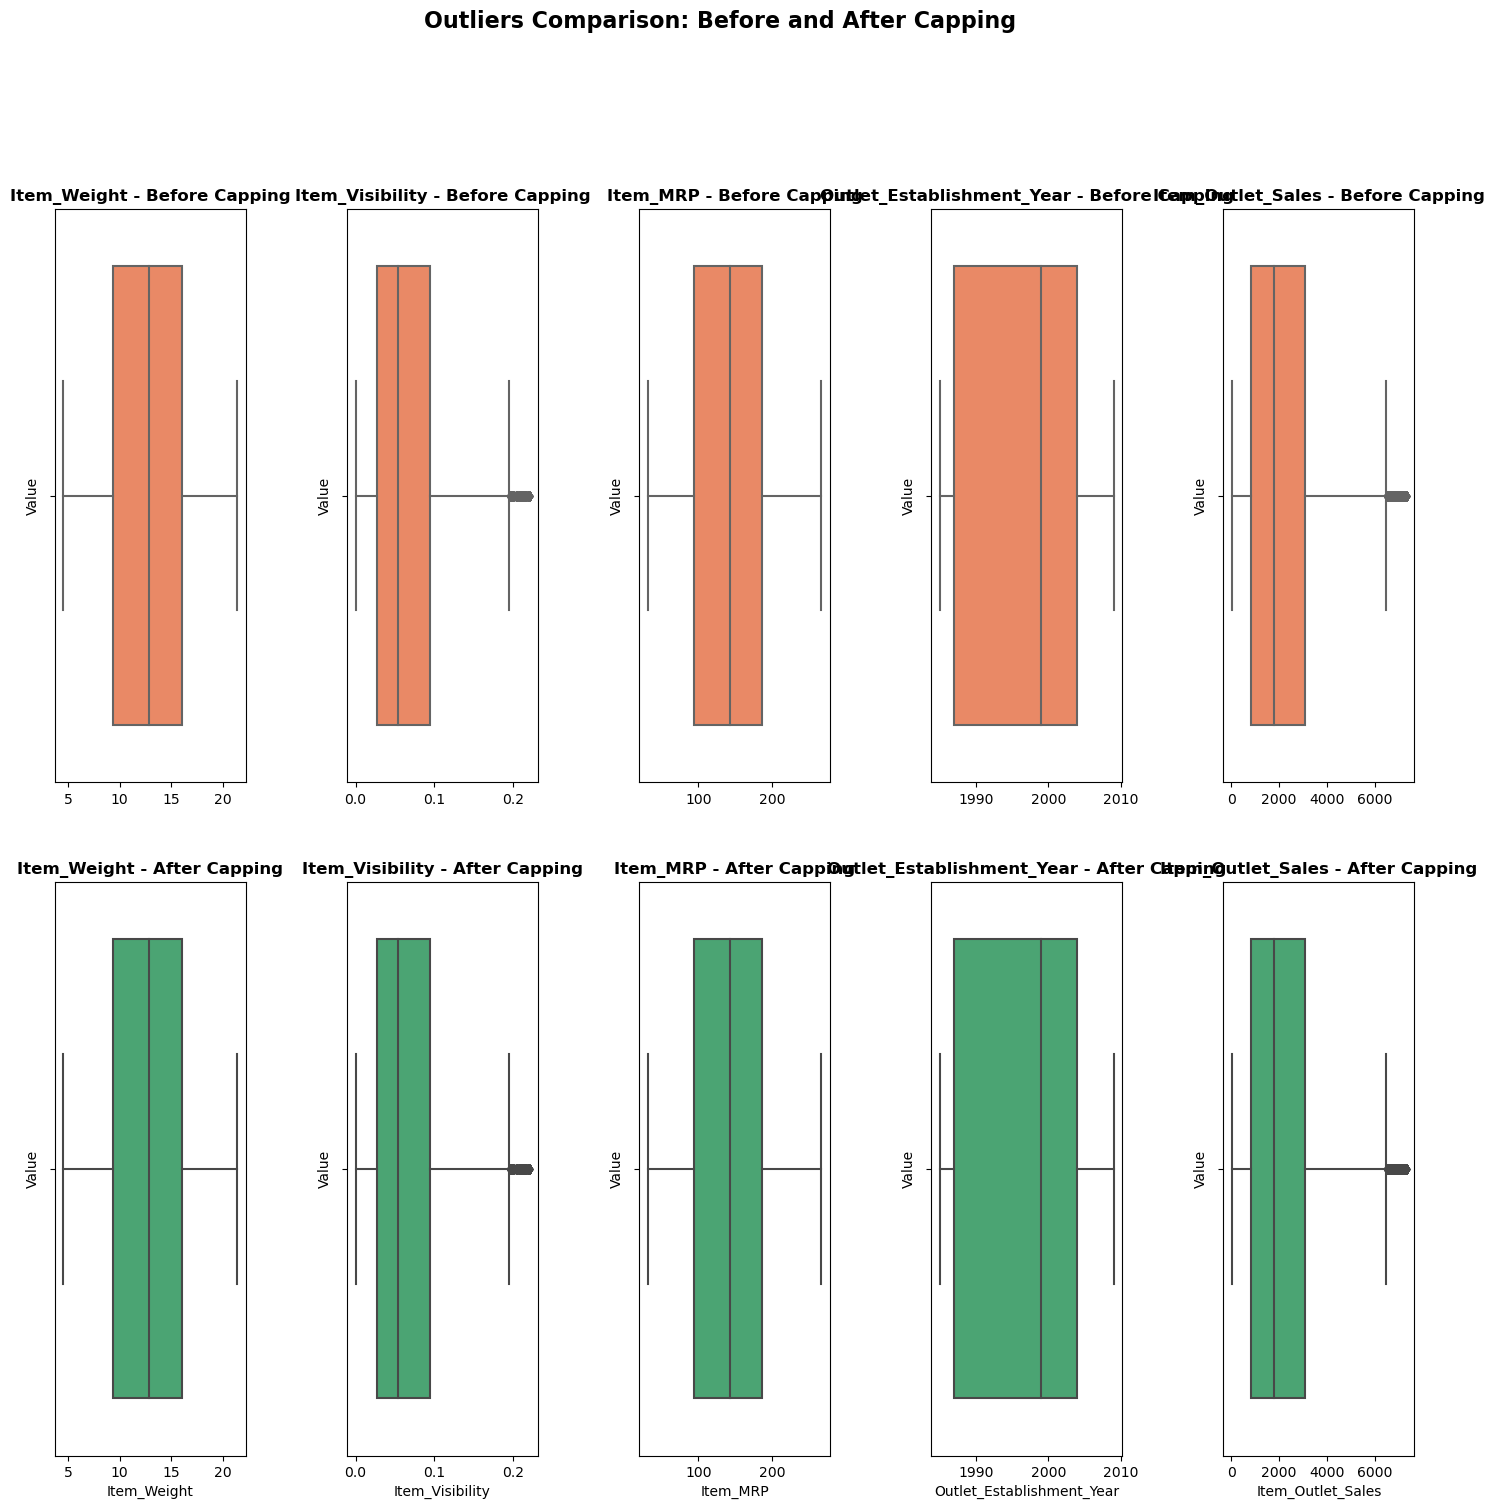

In [44]:
# Function to plot outliers comparison: before and after capping
def plot_outliers_comparison(df, numerical_features):
    num_features = len(numerical_features)  # Number of numerical columns
    plt.figure(figsize=(15, num_features * 3))  # Increased width for better clarity
    
    # Plotting "Before Capping" for each column
    for idx, feature in enumerate(numerical_features, start=1):
        plt.subplot(2, num_features, idx)
        sns.boxplot(data=df, x=feature, color='coral')
        plt.title(f"{feature} - Before Capping", fontsize=12, weight='bold')
        plt.xlabel("", fontsize=10)  # Remove xlabel for cleaner look
        plt.ylabel("Value", fontsize=10)

    # Plotting "After Capping" for each column
    for idx, feature in enumerate(numerical_features, start=1):
        plt.subplot(2, num_features, idx + num_features)
        sns.boxplot(data=df, x=feature, color='mediumseagreen')
        plt.title(f"{feature} - After Capping", fontsize=12, weight='bold')
        plt.xlabel(feature, fontsize=10)
        plt.ylabel("Value", fontsize=10)

    # Add overall plot titles for clarity
    plt.suptitle("Outliers Comparison: Before and After Capping", fontsize=16, weight='bold', y=1.03)
    
    # Adjust layout to avoid overlapping plots
    plt.tight_layout(pad=4.0)  # Increased padding for better separation between rows
    plt.show()

# Call the function to plot before and after capping
plot_outliers_comparison(df, numerical_cols)


#### 1. Outlier Detection using IQR
   * Approach: Calculated the Interquartile Range (IQR) to identify values outside 1.5 times the IQR.
   * Numerical Columns Analyzed:
         * Item_Weight
         * Item_Visibility
         * Item_MRP
         * Outlet_Establishment_Year
         * Item_Outlet_Sales
    * Outliers Detected:
         * Item_Weight: 0
         * Item_Visibility: 144
         * Item_MRP: 0
         * Outlet_Establishment_Year: 0
         * Item_Outlet_Sales: 186
#### 2. Columns with Significant Outliers
   * Identified Columns:
        * Item_Visibility
        * Item_Outlet_Sales
#### 3. Outlier Handling with Z-Score Capping
   * Method: Applied capping based on a Z-score threshold of 3.
   * Process:
         * Calculated upper and lower bounds using column mean and standard deviation.
         * Replaced outliers with the nearest boundary values.
   * Result: Outliers in Item_Visibility and Item_Outlet_Sales were capped.
#### 4. Outlier Visualization: Before and After Capping
   * Purpose: Compared distributions of numerical features before and after outlier capping.
   * Visualization Setup:
        * Used boxplots for all numerical features.
        * Displayed "Before Capping" and "After Capping" for each feature side by side.
   * Outcome: Demonstrated reduced outlier effects in capped columns.

### 9. FEATURE SCALING

In [45]:
min_max_scaler = MinMaxScaler()  # Initializing Min-Max Scaler
data_encoded[['Item_MRP', 'Item_Visibility']] = min_max_scaler.fit_transform(data_encoded[['Item_MRP', 'Item_Visibility']])
# Displaying the scaled data
data_encoded[['Item_MRP', 'Item_Visibility']].head()  # Checking the scaled values for 'Item_MRP' and 'Item_Visibility'

,Item_MRP,Item_Visibility
0,0.927507,0.048866
1,0.072068,0.058705
2,0.468288,0.051037
3,0.640093,0.000000
4,0.095805,0.000000


In [46]:
print(data_encoded[['Item_MRP', 'Item_Visibility']].skew())

Item_MRP           0.127202
Item_Visibility    1.167091
dtype: float64


In [47]:
data_encoded['Item_Visibility'] = np.sqrt(data_encoded['Item_Visibility'])

In [48]:
print(data_encoded[['Item_MRP', 'Item_Visibility']].skew())

Item_MRP           0.127202
Item_Visibility   -0.098056
dtype: float64


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

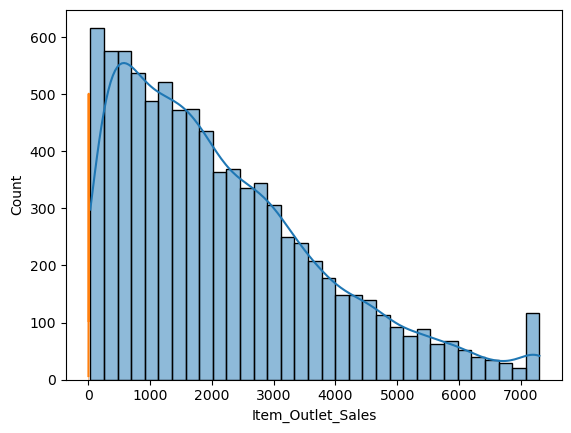

In [49]:
# Investigating the distribution of 'Item_Outlet_Sales'
sns.histplot(df['Item_Outlet_Sales'], kde=True)  # Plotting the histogram with KDE for 'Item_Outlet_Sales'

# Applying log transformation to reduce skewness in the 'Item_Outlet_Sales' distribution
df['Item_Outlet_Sales_Log'] = np.log1p(df['Item_Outlet_Sales'])  # log1p for log(1 + x)

# Checking the distribution after applying the log transformation
sns.histplot(df['Item_Outlet_Sales_Log'], kde=True)  # Plotting the histogram with KDE 

#### Min-Max Scaling:

   * Scaled Item_MRP and Item_Visibility to a range of [0, 1].
   * Transformed data to ensure uniform scale for better model performance.
#### Skewness Analysis:
   * Item_MRP was slightly skewed, while Item_Visibility was moderately skewed.
   * Applied square root transformation to Item_Visibility to reduce skewness.
#### Item_Outlet_Sales Distribution:
   * The original distribution of Item_Outlet_Sales was highly skewed.
   * Log transformation (log1p) was applied to normalize the distribution.
#### Visualizations:
   * Histograms with KDE showed right-skewed data for Item_Outlet_Sales before transformation.
   * After log transformation, the distribution became more normalized.


In [50]:
print(data_encoded.columns)

Index(['Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Size', 'Item_Weight',
       'Item_Visibility', 'Item_MRP', 'Item_Identifier', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'MRP_Range',
       'Visibility_Range', 'Outlet_age', 'sales_per_mrp'],
      dtype='object')


### 11. MODELING

In [89]:
# Separating features (X) and target variable (y)
X = df.drop('Item_Outlet_Sales', axis=1)  # Features
y = df['Item_Outlet_Sales']  # Target

In [90]:
# Splitting the data into training and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# List of categorical columns to encode
categorical_cols = ['Item_Fat_Content', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
# Label encoding categorical features
label_encoder = LabelEncoder()
for col in categorical_cols:
    if col in data_encoded.columns:
        data_encoded[col] = label_encoder.fit_transform(data_encoded[col])
X = data_encoded.drop(columns='Item_Outlet_Sales')
y = data_encoded['Item_Outlet_Sales']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Using RandomForestRegressor to determine feature importance
feature_selector = RandomForestRegressor(n_estimators=100, random_state=42)
feature_selector.fit(x_train, y_train)
# Selecting the top 10 important features based on feature importance scores
feature_importances = pd.Series(feature_selector.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(10).index
# Creating new datasets based on top 10 important features
X_top = X[top_features]
x_train, x_test = x_train[top_features], x_test[top_features]
print("Top 10 important features:\n", top_features)

Top 10 important features:
 Index(['sales_per_mrp', 'Item_MRP', 'Item_Identifier', 'Item_Visibility',
       'Item_Weight', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_age', 'Item_Type_Household', 'Item_Fat_Content_Regular'],
      dtype='object')


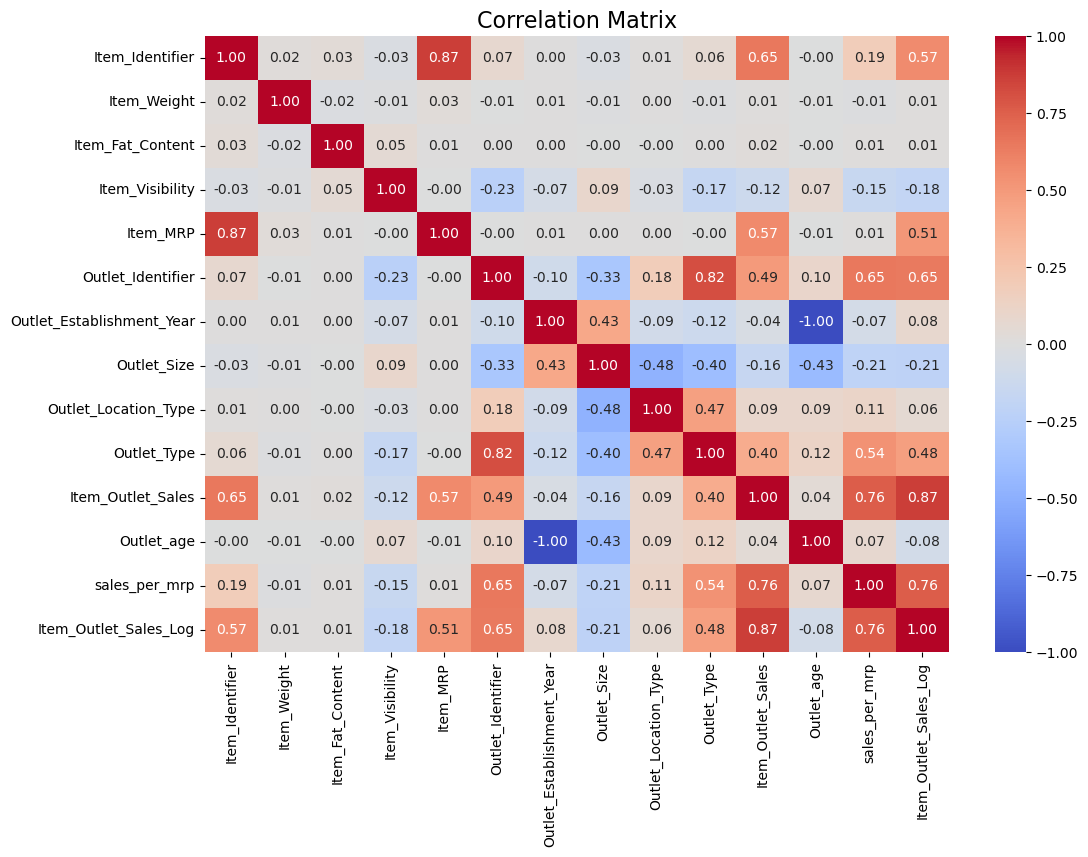

In [92]:
label_encoder = LabelEncoder()
categorical_columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']  # Add any other categorical columns here

# Encode categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Select only numeric columns for the correlation matrix
numeric_data = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [93]:
# Defining multiple regression models for evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Decision Tree": DecisionTreeRegressor(random_state=2),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": make_pipeline(StandardScaler(), SVR(kernel='linear')),
    "KNN Regression": KNeighborsRegressor(n_neighbors=5),
    "XGBoost Regression": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, verbosity=0),
}

# Setting up to perform repeated train-test splits for model stability
n_runs = 10
results = {}

# Loop for each model evaluation
for model_name, model in models.items():
    test_r2_scores = []
    
    # Repeating train-test split for stability in R² scores
    for i in range(n_runs):
        x_train, x_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=i)
        
        model.fit(x_train, y_train)
        y_test_pred = model.predict(x_test)
       
        test_r2 = r2_score(y_test, y_test_pred)
        test_r2_scores.append(test_r2)
    
    mean_r2 = np.mean(test_r2_scores)
    std_dev_r2 = np.std(test_r2_scores)
    
    results[model_name] = {
        "Mean Test R2": mean_r2,
        "Standard Deviation of Test R2": std_dev_r2
    }
    
    print(f"\n--- {model_name} ---")
    print(f"Mean Test R2: {results[model_name]['Mean Test R2']}")
    print(f"Standard Deviation of Test R2: {results[model_name]['Standard Deviation of Test R2']}")


--- Linear Regression ---
Mean Test R2: 0.8880685788642075
Standard Deviation of Test R2: 0.006173994806231629

--- Polynomial Regression ---
Mean Test R2: 1.0
Standard Deviation of Test R2: 0.0

--- Decision Tree ---
Mean Test R2: 0.9959139540639035
Standard Deviation of Test R2: 0.0012264933304914777

--- Random Forest ---
Mean Test R2: 0.9984043118584456
Standard Deviation of Test R2: 0.0007937946469513198

--- Support Vector Regression ---
Mean Test R2: 0.8695977515357086
Standard Deviation of Test R2: 0.0047263789552770925

--- KNN Regression ---
Mean Test R2: 0.8919647919301186
Standard Deviation of Test R2: 0.0033790743046911522

--- XGBoost Regression ---
Mean Test R2: 0.9970922554826741
Standard Deviation of Test R2: 0.0005405026218729558


In [94]:
# Identify the best model based on the highest Mean Test R² score (below 1.0)
best_model_name = max(
    (model_name for model_name in results if results[model_name]['Mean Test R2'] < 1.0),
    key=lambda model_name: results[model_name]['Mean Test R2']
)

# Retrieve the best model and its details
best_model = models[best_model_name]
mean_r2 = results[best_model_name]['Mean Test R2']
std_r2 = results[best_model_name]['Standard Deviation of Test R2']

# Print the results in a more descriptive format
print(f"🏆 Best Model Selected: '{best_model_name}'")
print(f"🔹 Mean Test R²: {mean_r2:.4f}")
print(f"🔹 Standard Deviation of Test R²: {std_r2:.4f}")


🏆 Best Model Selected: 'Random Forest'
🔹 Mean Test R²: 0.9984
🔹 Standard Deviation of Test R²: 0.0008


In [50]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform a single train-test split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Fit the Random Forest model to the training data
rf_model.fit(X_train, y_train)

# Evaluate on the test set
y_test_predictions = rf_model.predict(X_test)
test_r2_score = r2_score(y_test, y_test_predictions)

# Evaluate on the training set
y_train_predictions = rf_model.predict(X_train)
train_r2_score = r2_score(y_train, y_train_predictions)

# Display the results with detailed formatting
print(f"🌟 --- Random Forest Model Performance --- 🌟")
print(f"📊 Test R² Score: {test_r2_score:.4f}")
print(f"📊 Train R² Score: {train_r2_score:.4f}")

# Highlight potential overfitting or underfitting
if train_r2_score > 0.95 and test_r2_score < 0.8:
    print("⚠️ Warning: Potential overfitting detected!")
elif test_r2_score > 0.95:
    print("✅ Excellent performance on the test set!")
else:
    print("👌 Model shows balanced performance.")

🌟 --- Random Forest Model Performance --- 🌟
📊 Test R² Score: 0.9985
📊 Train R² Score: 0.9998
✅ Excellent performance on the test set!


In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming `X_test` contains the test features and `y_test` contains actual sales_per_mrp
y_pred = model.predict(X_test)  # Predicted values for sales_per_mrp

# Convert y_test to a single column if it's not already isolated
y_test = y_test['sales_per_mrp'] if isinstance(y_test, pd.DataFrame) else y_test

# Compare actual vs predicted in a DataFrame
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Display the comparison
print(comparison.head())

# Optionally calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

         Actual    Predicted
7503  1743.0644  1659.020630
2957   356.8688   368.531281
7031   377.5086   397.448425
1084  5778.4782  5828.791992
856   2356.9320  2486.519531
Mean Squared Error: 6207.832535758104
R2 Score: 0.9977160040826036


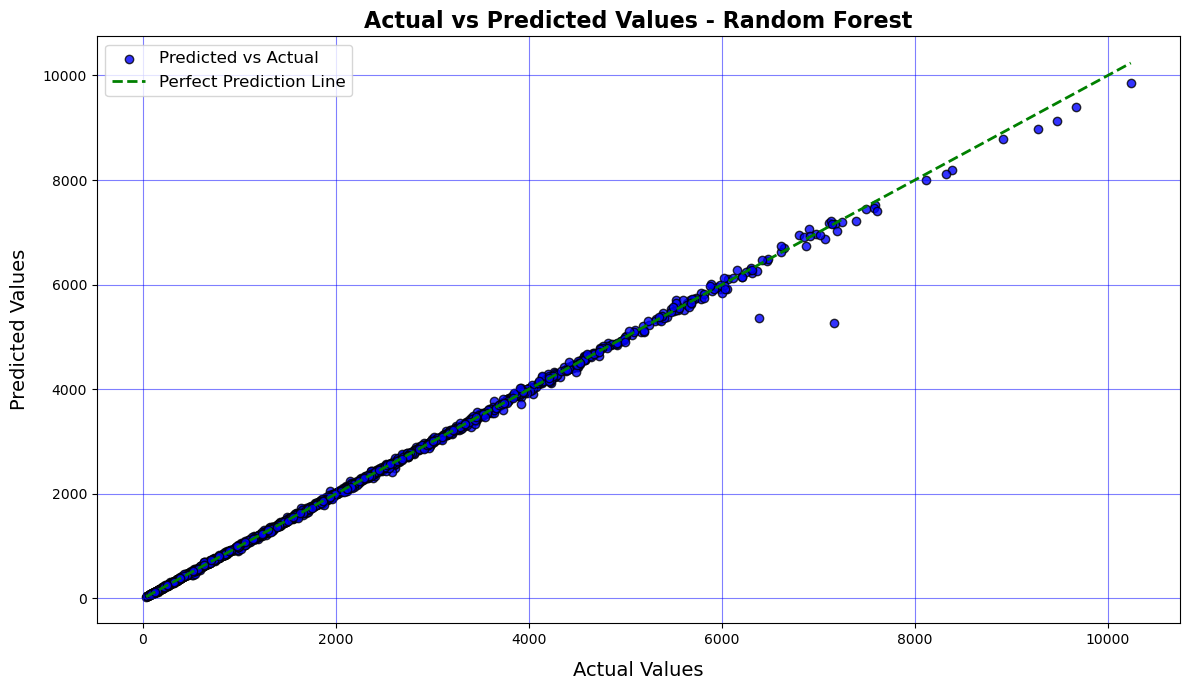

In [52]:
# Make predictions using the trained Random Forest model
y_pred = rf_model.predict(X_test)

# Plotting Actual vs Predicted values
plt.figure(figsize=(12, 7))  # Larger plot for better visibility

# Darker color for the scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.8, edgecolors='black', label="Predicted vs Actual")  # Dark Blue color

# Darker color for the perfect prediction line
plt.plot(
    [min(y_test), max(y_test)], 
    [min(y_test), max(y_test)], 
    color='green', linestyle='--', linewidth=2, label="Perfect Prediction Line"  # Dark Orange color
)

# Title and Labels with bold and larger fonts
plt.title('Actual vs Predicted Values - Random Forest', fontsize=16, weight='bold')
plt.xlabel('Actual Values', fontsize=14, labelpad=10)
plt.ylabel('Predicted Values', fontsize=14, labelpad=10)

# Grid styling with darker lines for better visibility
plt.grid(visible=True, linestyle='-', color='blue', alpha=0.5)

# Adding a legend
plt.legend(fontsize=12, loc='best')

# Adjusting the layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()
